In [18]:
import numpy as np
import random
from grid_world import GridWorld
from tqdm import tqdm
from draw import draw

rows = 5
cols = 5
env = GridWorld(
    forbidden_score=-10,
    terminal_score=1,
    desc=[".....", ".##..", "..#..", ".#T#.", ".#..."],
)
env.render_grid()


⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


In [19]:
policy = 0.2 * np.ones((rows * cols, 5))
episodes = [
    env.get_traj(10, action=random.randint(0, 4), policy=policy) for i in range(500)
]
learning_rate = 0.01
gamma = 0.99
action_values = np.random.rand(25, 5)


  0%|          | 0/100 [00:00<?, ?it/s]

➡️➡️🔄⬅️⬇️
⬆️⏫️⏫️⬇️⬆️
⬆️⬅️⏬➡️⬅️
⬇️⏩️✅⏪⬆️
🔄⏩️➡️⬅️⬆️


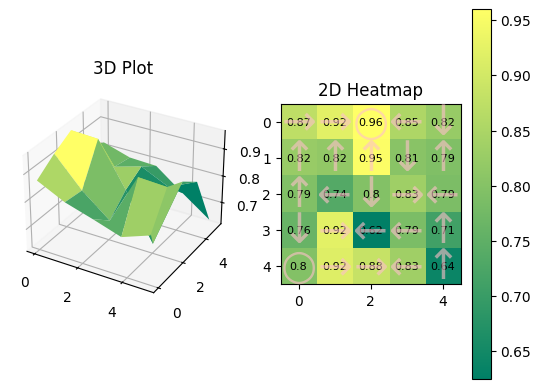

 19%|█▉        | 19/100 [00:01<00:05, 16.17it/s]

➡️➡️➡️➡️⬇️
⬆️⏫️⏩️➡️⬇️
⬆️⬅️⏬➡️⬇️
⬆️⏩️✅⏪⬇️
⬆️⏩️⬆️⬅️⬅️


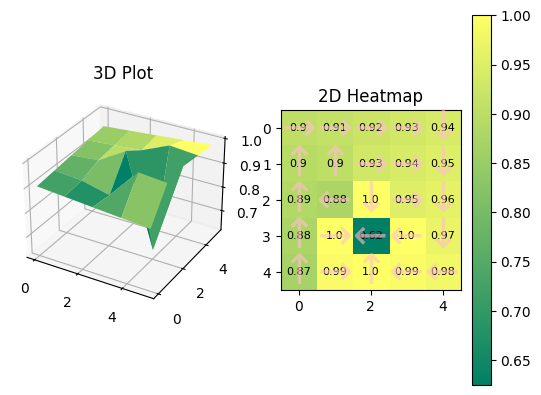

 39%|███▉      | 39/100 [00:02<00:03, 17.48it/s]

➡️➡️➡️➡️⬇️
⬆️⏫️⏩️➡️⬇️
⬆️⬅️⏬➡️⬇️
⬆️⏩️✅⏪⬇️
⬆️⏩️⬆️⬅️⬅️


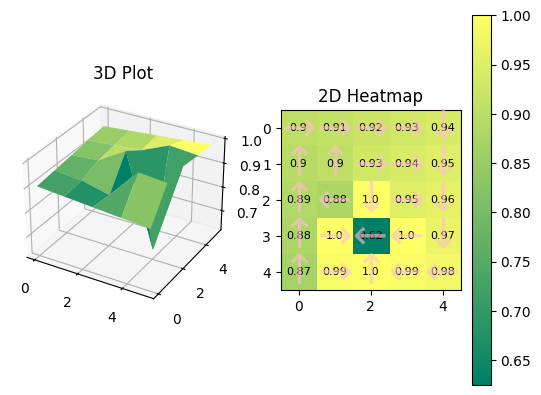

 59%|█████▉    | 59/100 [00:03<00:02, 17.29it/s]

➡️➡️➡️➡️⬇️
⬆️⏫️⏩️➡️⬇️
⬆️⬅️⏬➡️⬇️
⬆️⏩️✅⏪⬇️
⬆️⏩️⬆️⬅️⬅️


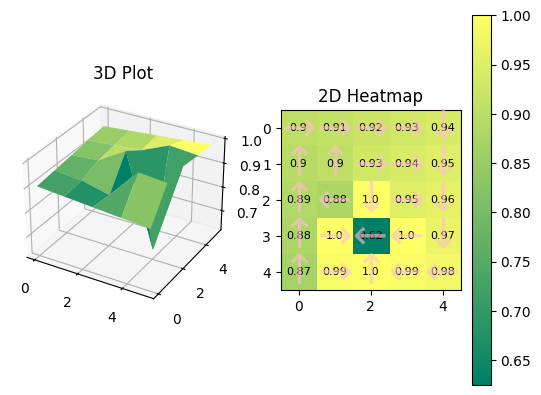

 79%|███████▉  | 79/100 [00:05<00:01, 15.82it/s]

➡️➡️➡️➡️⬇️
⬆️⏫️⏩️➡️⬇️
⬆️⬅️⏬➡️⬇️
⬆️⏩️✅⏪⬇️
⬆️⏩️⬆️⬅️⬅️


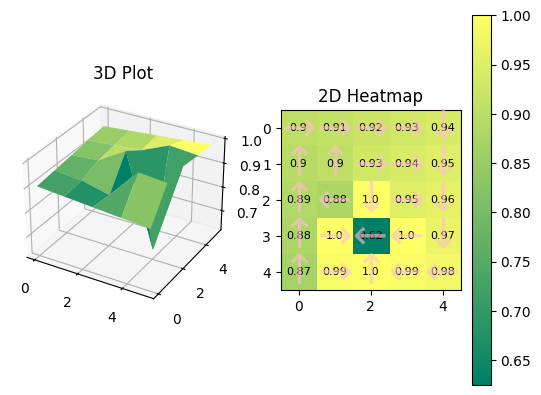

100%|██████████| 100/100 [00:06<00:00, 15.00it/s]


In [20]:
for _ in tqdm(range(100)):
    for i in range(len(episodes)):
        for j in range(len(episodes[i]) - 1, -1, -1):
            trajectory = episodes[i][j]
            tmpstate, tmpaction, tmpscore, nextState, nextAction, terminal = trajectory

            next_action_value = action_values[nextState].max()
            target = tmpscore + (1.0 - terminal) * gamma * next_action_value
            TD_error = action_values[tmpstate][tmpaction] - target

            action_values[tmpstate][tmpaction] -= learning_rate * TD_error

    if _ % 20 == 0:
        policy = np.eye(5)[np.argmax(action_values, axis=1)]
        env.render_policy(policy)

        state_values = np.max(action_values, axis=1)
        p = np.argmax(action_values, axis=1)
        draw(state_values.reshape(5, 5), p)
